In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [2]:
train= pd.read_csv("train_loan.csv")
test= pd.read_csv("test_loan.csv")

In [3]:
train_original=train.copy()
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

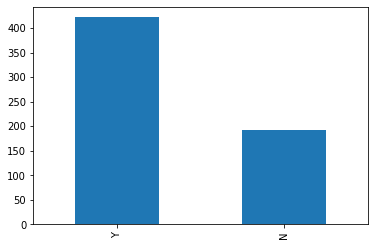

In [14]:
train['Loan_Status'].value_counts().plot.bar()

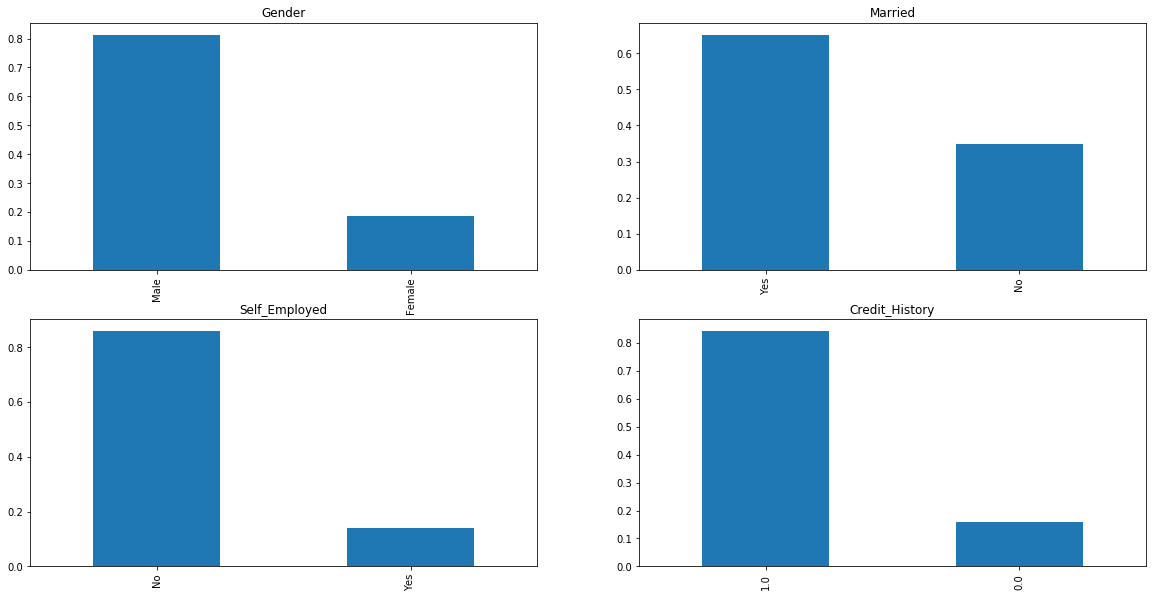

In [15]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)

train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)


train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)

train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')
plt.show()



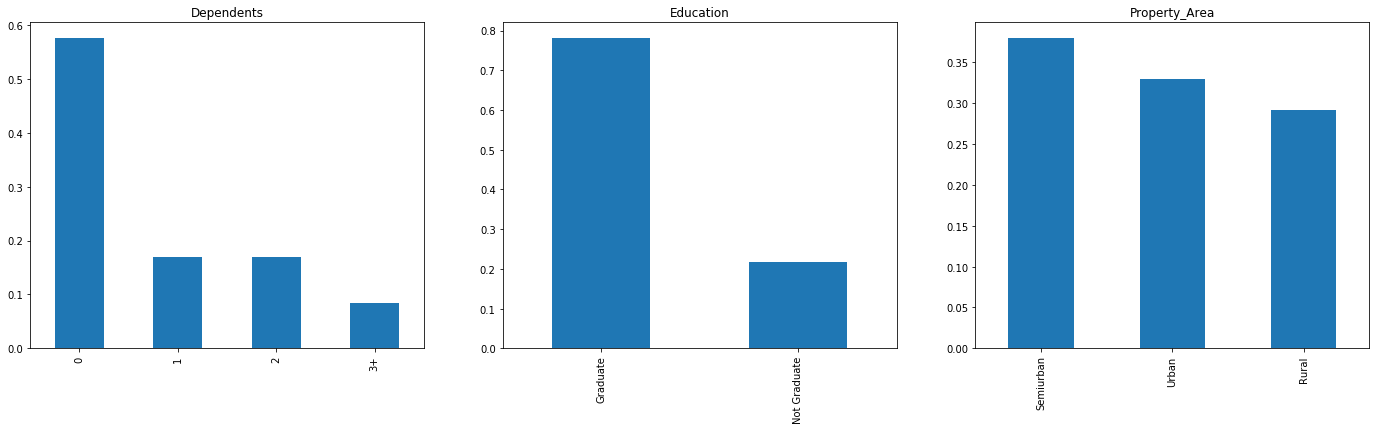

In [16]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)

train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)

train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')
plt.show()

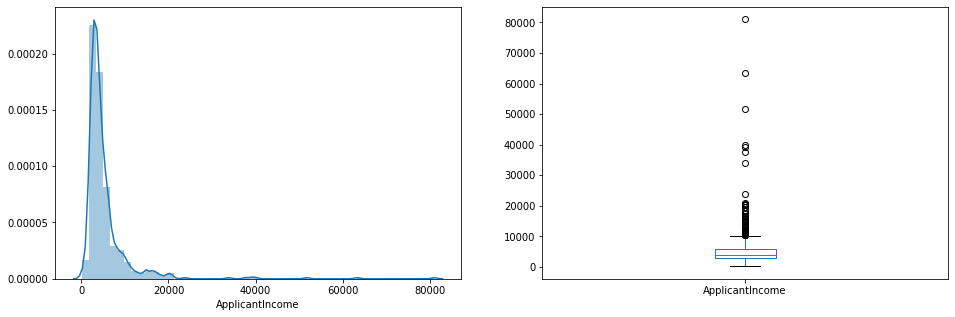

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)

train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

NameError: name 'Text' is not defined

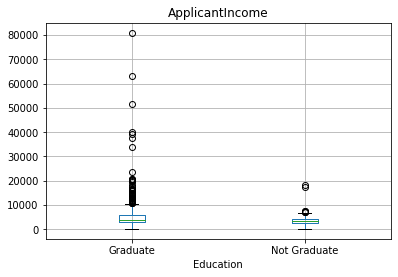

In [18]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")
Text(0.5,0.98,'')

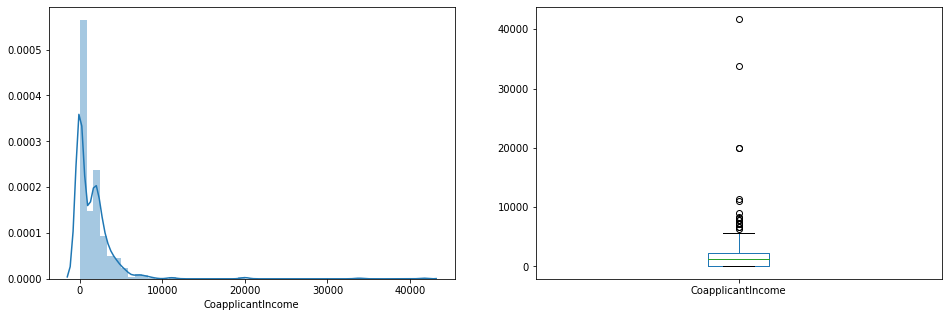

In [20]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()


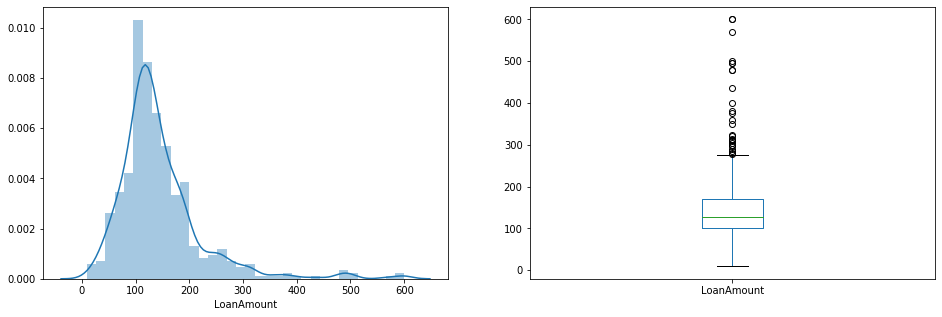

In [21]:
plt.figure(1)
plt.subplot(121)

df=train.dropna()

sns.distplot(df['LoanAmount']);
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

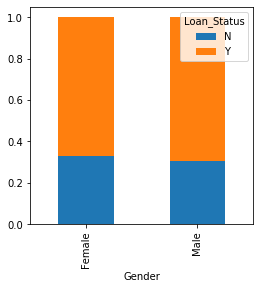

In [22]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])

Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

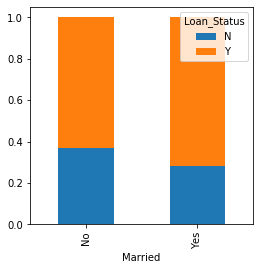

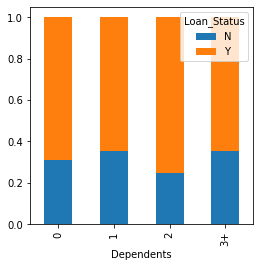

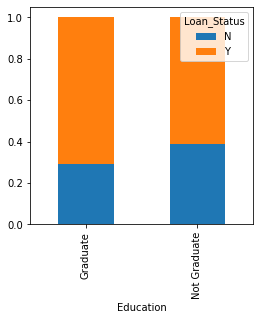

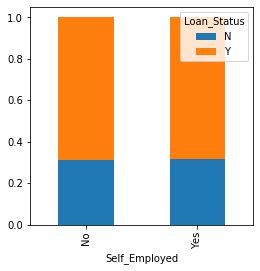

In [23]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])

dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])

Education=pd.crosstab(train['Education'],train['Loan_Status'])

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])


Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

dependents.div(dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

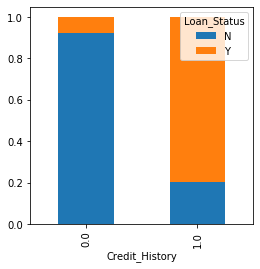

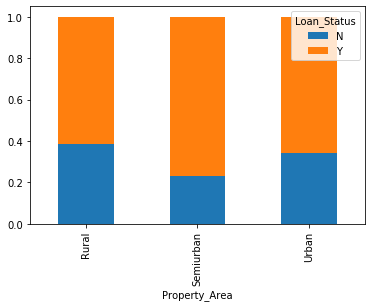

In [24]:
Credit_History= pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=  pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

plt.show()

Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.show()

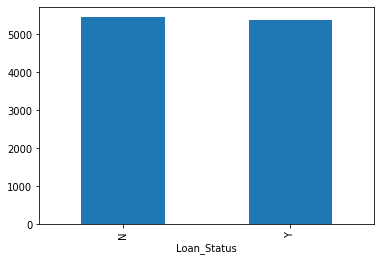

In [25]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

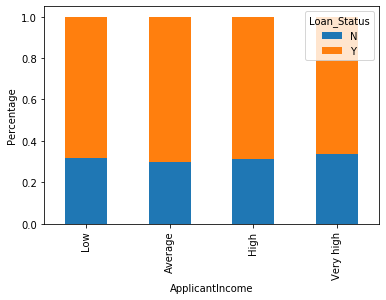

In [26]:
bins=[0,2500,4000,6000,81000]

group=['Low','Average','High','Very high']

train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.xlabel('ApplicantIncome')

P=plt.ylabel('Percentage')

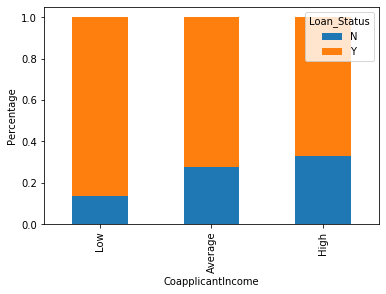

In [27]:
bins=[0,1000,3000,42000]

group=['Low','Average','High']

train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])

Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.xlabel('CoapplicantIncome')

P=plt.ylabel('Percentage')

In [28]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']


train['Total_Income']


0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: Total_Income, Length: 614, dtype: float64

In [29]:
bins=[0,2500,4000,6000,81000]

group=['Low','Average','High','Very high']

train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

train['Total_Income_bin']

0           High
1      Very high
2        Average
3           High
4           High
         ...    
609      Average
610         High
611    Very high
612    Very high
613         High
Name: Total_Income_bin, Length: 614, dtype: category
Categories (4, object): [Low < Average < High < Very high]

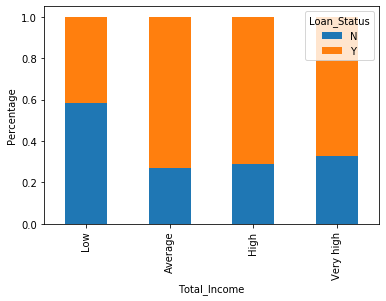

In [30]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])

Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.xlabel('Total_Income')

P=plt.ylabel('Percentage')

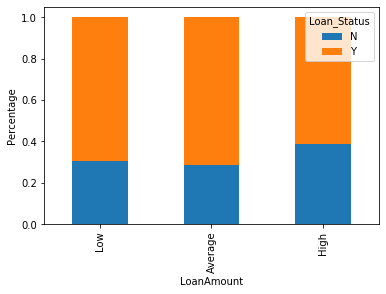

In [31]:
bins=[0,100,200,700]

group=['Low','Average','High']

train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])

LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

plt.xlabel('LoanAmount')

P=plt.ylabel('Percentage')

In [32]:
#train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,NaN,6000.0,High,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,Average,NaN,2900.0,Average,Low
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,High,NaN,4106.0,High,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,Very high,Low,8312.0,Very high,High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,Very high,NaN,7583.0,Very high,Average


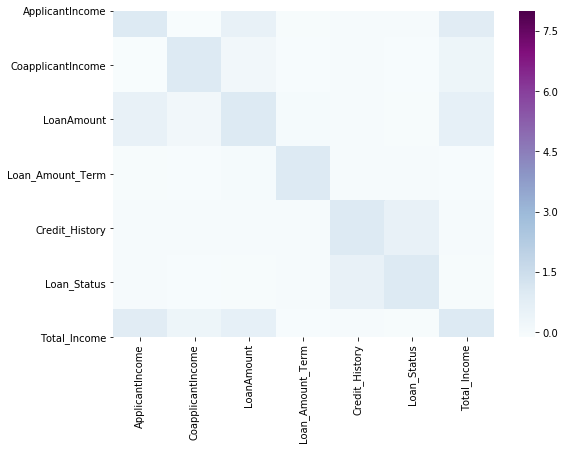

In [33]:
matrix=train.corr()

f,ax= plt.subplots(figsize=(9,6))

sns.heatmap(matrix,vmax=8,square=True,cmap="BuPu")

In [34]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [35]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)

train['Married'].fillna(train['Married'].mode()[0],inplace=True)

train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)



In [36]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [37]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [39]:
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [40]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [41]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [42]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
Total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [43]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)

test['Married'].fillna(test['Married'].mode()[0],inplace=True)

test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)

test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)


test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)



In [44]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

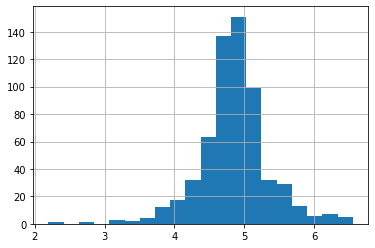

In [45]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

test['LoanAmount_log']=np.log(test['LoanAmount'])
#test['LoanAmount_log'].hist(bins=20)


Evaluation Metrics for Classification Problems

Accuracy- it using confusion matrix which is tabular fromat of actual vs predicted values. 

True postitive- targets which are actually true (Y) and we have predicted them true 

True negative- targets which are actually false (N and we have predicted them false (N)

False positive - targets whsich are actually false N and we have predicted them true Y

False negative- targets which are actually True Y but we have predicted false N


Precision- measure of correctness in true prediction 
        = TP/(TP+FP)
        
Recall= TP/(TP+FN)

Specificity= TN/(TN+FP)

ROC curve= receiver operating characterstic

In [46]:
#Model Building

train=train.drop('Loan_ID',axis=1)

test=test.drop('Loan_ID',axis=1)

In [47]:
X=train.drop('Loan_Status',1)
y=train.Loan_Status

In [48]:
X=pd.get_dummies(X)

train=pd.get_dummies(train)

test=pd.get_dummies(test)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_cv,y_train,y_cv= train_test_split(X,y,test_size=0.3)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [51]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,solver='liblinear',tol=0.0001,verbose=0,warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [52]:
pred_cv= model.predict(x_cv)

In [53]:
accuracy_score(y_cv,pred_cv) # 77% accurate,identified 77% of loan status correctly

0.8108108108108109

In [54]:
pred_test=model.predict(test)

ValueError: X has 21 features per sample; expecting 36

In [56]:
submission=pd.read_csv("sample_submission.csv")



In [57]:
pred_test.shape

NameError: name 'pred_test' is not defined

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0,'N',inplace=True)

submission['Loan_Status'].replace(1,'Y',inplace=True)

In [ ]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [ ]:
194*20

In [ ]:
628/194.75

In [ ]:
# Logistic regression using stratified k-folds cross validation

from sklearn.model_selection import StratifiedKFold

In [ ]:
i=1
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    pred_test= model.predict(test)
    pred=model.predict_proba(xvl)[:,1]
        

In [ ]:
from sklearn import metrics 

fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))

plt.plot(fpr,tpr,label="validation, auc="+str(auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')

plt.legend(loc=4)

plt.show()


In [ ]:
submission['Loan_Status']=pred_test

submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Logisic.csv')

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

test['Total_Income']=test['ApplicantIncome']+train['CoapplicantIncome']



In [ ]:
sns.distplot(train['Total_Income'])

In [ ]:
train['Total_Income_log']=np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])

test['Total_Income_log']=np.log(test['Total_Income'])

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']

test['EMI']=test['LoanAmount']/train['Loan_Amount_Term']

sns.distplot(train['EMI'])

In [ ]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)
#multiply with 1000 to make units equal test

test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

sns.distplot(train['Balance Income'])

In [ ]:
train=train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

test=test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)



In [ ]:
test

In [ ]:
##Model building

X=train.drop('Loan_Status',1)
y=train.Loan_Status


In [ ]:
X=pd.get_dummies(X)

train=pd.get_dummies(train)

test=pd.get_dummies(test)

In [ ]:
##Logistic Regression

i=1
kf= StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl=X.loc[train_index],X.loc[test_index]
    ytr,yvl=y[train_index],y[test_index]
    
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
   # pred_test= model.predict(test)
    #pred=model.predict_proba(xvl)[:,1]

In [ ]:
#pred_test= model.predict(test)
#pred=model.predict_proba(xvl)[:,1]

test= test.dropna()
xvl=xvl.dropna()

In [ ]:
pred_test= model.predict(test)
pred= model.predict_proba(xvl)[:,1]

